In [1]:
#minimos cuafrados 1a

In [106]:
x = np.linspace(0,8,10)
y = np.zeros((3,len(x)))

y[0] = 2*x-2
y[1] = -0.5*x + 0.5
y[2] = 4 - x

A = np.array([[2,-1],[1,2],[1,1]])
b = np.array([2,1,4])
At = A.T
print(A.shape)
print(b.shape)

(3, 2)
(3,)


In [94]:
print(At)

[[ 2  1  1]
 [-1  2  1]]


In [95]:
M = np.dot(At,A)
print(M)

[[6 1]
 [1 6]]


In [96]:
bt = np.dot(At,b)
print(bt)

[9 4]


In [99]:
xsol = np.linalg.solve(M,bt)
print(xsol)

[1.42857143 0.42857143]


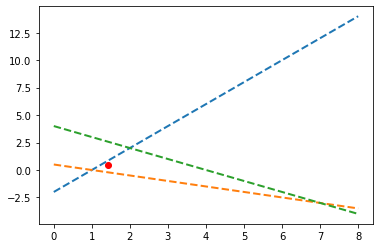

In [100]:
for l in range(y.shape[0]):
    plt.plot(x,y[l],ls='--',lw=2)
plt.scatter(xsol[0],xsol[1],color='r')

In [103]:
# Esta sería la menor distancia
np.linalg.norm(np.dot(A,xsol)-b)


2.5354627641855494

In [102]:
# En otro lugar, la distancia siempre es mayor.
np.linalg.norm(np.dot(A,[2.,2.])-b)

5.0

In [104]:
#1b

In [ ]:
##########
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f1(x, y):
    return 2*x - y - 2

def f2(x, y):
    return x + 2*y - 1

def f3(x, y):
    return x + y - 4

def distancia(f1, f2, f3):
    return np.sqrt(f1**2 + f2**2 + f3**2)

x = np.arange(-5, 5, 0.01)
y = np.arange(-5, 5, 0.01)
x, y = np.meshgrid(x, y)

dist = distancia(f1(x, y), f2(x, y), f3(x, y))

minimo = np.unravel_index(np.argmin(dist, axis=None), dist.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, dist, cmap='viridis')
ax.scatter(x[minimo], y[minimo], dist[minimo], color='r')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Distancia')
plt.show()

print(f"La menor distancia es {dist[minimo]} en el punto ({x[minimo]}, {y[minimo]})")


(3, 2)
(3,)
[[ 2  1  1]
 [-1  2  1]]
[[6 1]
 [1 6]]
[9 4]
[1.42857143 0.42857143]


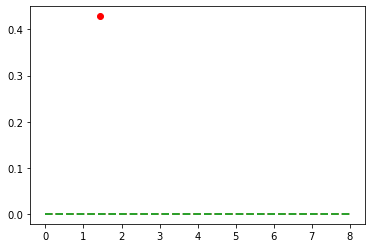

In [116]:
b=np.linspace (-5,5,100)

f1 = lambda x,y: 2*x - y -2
f2 = lambda x,y: x + 2*y -1
f3 = lambda x,y: x + y -4


rm: Data/*: No such file or directory
File loaded


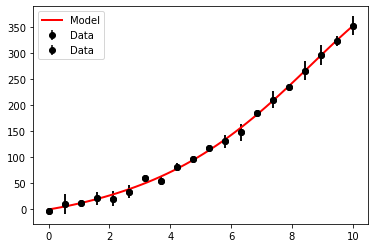

In [114]:
x = np.linspace(0,8,10)
y = np.zeros((3,len(x)))

y[0] = 2*x-2
y[1] = -0.5*x + 0.5
y[2] = 4 - x

A = np.array([[2,-1],[1,2],[1,1]])
b = np.array([2,1,4])
At = A.T
print(A.shape)
print(b.shape)
print(At)
M = np.dot(At,A)
print(M)
bt = np.dot(At,b)
print(bt)
xsol = np.linalg.solve(M,bt)
print(xsol)
for l in range(y.shape[0]):
    plt.plot(x,y[l],ls='--',lw=2)
plt.scatter(xsol[0],xsol[1],color='r')

In [97]:
#markov 1

#c

import matplotlib.pyplot as plt
from itertools import permutations
import numpy as np
from itertools import combinations_with_replacement

Pj= np.array([[0.5, 0.5]]) # cara sello
Ps= np.array([[0.9, 0.1]])

T = np.array([[0.8, 0.2],
              [0.2,0.8]])
E = np.array([[0.5, 0.9],
              [0.5,0.1]])

States= np.array([0,1]) #0 S, 1 C

DictH = {0:'Sello',1:'Cara'} 

apri=np.array([0.2, 0.8]) #para ps y pj

Obs= np.array([0,1,1,1,0,1,0,1])
#(S,C,C,C,S,C,S,C)


In [98]:
def GetStates(States,N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    print(CStates)
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
       # print(p)
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
                
    return np.array(Permu)

In [59]:
HiddenStates = GetStates(States,8)
HiddenStates

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [60]:
def GetProb(T,E,Obs,State,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[State[0]]
    
    # Matriz de transicion
    for i in range(n-1):
        p *= T[ State[i+1], State[i]  ]
        
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
        
    return p


In [61]:
P = np.zeros(HiddenStates.shape[0], dtype=np.float64)

In [62]:
for i in range(P.shape[0]):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],apri)
    
print(P)


[1.63840000e-04 8.19200000e-06 1.84320000e-05 2.04800000e-06
 1.84320000e-05 2.04800000e-06 2.04800000e-06 2.04800000e-06
 2.94912000e-04 1.47456000e-05 1.02400000e-07 3.68640000e-06
 9.21600000e-07 2.07360000e-06 3.68640000e-06 1.02400000e-07
 2.30400000e-07 2.56000000e-08 3.68640000e-06 1.02400000e-07
 2.30400000e-07 2.56000000e-08 2.30400000e-07 4.09600000e-07
 1.02400000e-07 2.30400000e-07 2.56000000e-08 2.30400000e-07
 2.56000000e-08 4.09600000e-07 1.47456000e-05 3.31776000e-05
 3.68640000e-06 3.31776000e-05 3.68640000e-06 3.68640000e-06
 5.89824000e-05 2.94912000e-06 1.65888000e-06 1.84320000e-07
 6.63552000e-06 1.84320000e-07 1.28000000e-09 4.60800000e-08
 1.84320000e-07 4.14720000e-07 7.37280000e-07 1.84320000e-07
 1.28000000e-09 4.60800000e-08 1.15200000e-08 2.59200000e-08
 4.60800000e-08 2.04800000e-08 4.60800000e-08 5.12000000e-09
 7.37280000e-07 1.84320000e-07 1.28000000e-09 4.60800000e-08
 1.15200000e-08 2.59200000e-08 4.60800000e-08 1.28000000e-09
 2.88000000e-09 3.200000

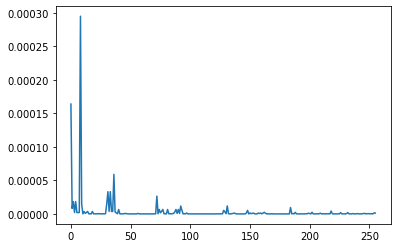

In [63]:
plt.plot(P)

In [64]:
ii = np.where( P == np.amax(P))
print(f"El estado oculto más probable es: {HiddenStates[ii]}, es decir:")
lista = []
for i in HiddenStates[ii][0]:
    lista.append(DictH[i])
print(lista)
print(f"Y su probabilidad es de : {max(P)}")

El estado oculto más probable es: [[1 0 0 0 0 0 0 0]], es decir:
['Cara', 'Sello', 'Sello', 'Sello', 'Sello', 'Sello', 'Sello', 'Sello']
Y su probabilidad es de : 0.00029491200000000015


In [65]:
np.sum(P)

0.0008814916088064008

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


In [109]:
ObsStates = GetStates([0,1],8)
Nobs = ObsStates.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):
    
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],apri)
        
    PObs[j] = np.sum(P)

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


In [111]:
ii = np.where( PObs == np.amax(PObs))
print(ObsStates[ii])

[[0 0 0 0 0 0 0 0]]


In [112]:

np.sum(PObs)

1.0000000000000007

In [81]:
# e

"La probabilidad apriori es un parametro necesario para ecnontrar las probabilidades ocultas al ser un parametro de las funciones"

'La probabilidad apriori es un parametro necesario para ecnontrar las probabilidades ocultas al ser un parametro de las funciones'